## Maps

We use the `geopandas` and `geoplot` to plot the map. We use the shapefile from Vietnam Government, with `adm = 1`.

In [100]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cmasher as cmr
import numpy as np
import seaborn as sns

### Setup

In [101]:
cmap = cmr.get_sub_cmap('Reds', 0.3, 1)

### Timeline: 2017 - 2019

In [102]:
# Load the data
df = pd.read_csv('../Data/province_stat.csv')
gdf = gpd.read_file('../Data/vnm_admbnda_adm1_gov_20201027.shp')
gdf

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_VI,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1VI,ADM1ALT2VI,ADM0_EN,ADM0_VI,ADM0_PCODE,date,validOn,validTo,geometry
0,2.900742,0.292040,An Giang,An Giang,VN805,NaN,NaN,NaN,NaN,NaN,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaN,"POLYGON ((105.11716 10.95483, 105.11732 10.951..."
1,3.419187,0.163033,Ba Ria - Vung Tau,Bà Rịa - Vũng Tàu,VN717,NaN,NaN,NaN,NaN,NaN,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaN,"MULTIPOLYGON (((106.55742 8.62810, 106.55723 8..."
2,4.514786,0.338748,Bac Giang,Bắc Giang,VN221,NaN,NaN,NaN,NaN,NaN,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaN,"POLYGON ((106.16302 21.62403, 106.16382 21.623..."
3,4.207590,0.425598,Bac Kan,Bắc Kạn,VN207,NaN,NaN,NaN,NaN,NaN,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaN,"POLYGON ((105.74147 22.73941, 105.74476 22.737..."
4,2.879202,0.204050,Bac Lieu,Bạc Liêu,VN821,NaN,NaN,NaN,NaN,NaN,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaN,"POLYGON ((105.29893 9.62913, 105.29970 9.62913..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1.992745,0.193366,Tra Vinh,Trà Vinh,VN817,NaN,NaN,NaN,NaN,NaN,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaN,"POLYGON ((106.25928 10.07410, 106.26083 10.073..."
59,4.975078,0.513176,Tuyen Quang,Tuyên Quang,VN211,NaN,NaN,NaN,NaN,NaN,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaN,"POLYGON ((105.17930 22.68197, 105.18012 22.681..."
60,2.075195,0.125808,Vinh Long,Vĩnh Long,VN809,NaN,NaN,NaN,NaN,NaN,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaN,"POLYGON ((106.02830 10.27396, 106.02865 10.272..."
61,1.892802,0.107688,Vinh Phuc,Vĩnh Phúc,VN104,NaN,NaN,NaN,NaN,NaN,Viet Nam,Việt Nam,VN,2019-10-01,2020-01-03,NaN,"POLYGON ((105.54746 21.57311, 105.54941 21.573..."


In [103]:
# Some provinces missing the 'city' suffix. We may hardcode it here.

for province in df['Province']:
    if province not in gdf['ADM1_EN'].values:
        df['Province'] = df['Province'].replace(province, province + ' city')

# Some provinces are not in the shapefile. We may add them manually.
for province in gdf['ADM1_EN'].values:
    if province not in df['Province'].values:
        df = pd.concat([df, pd.DataFrame({'Province': [province], 'Patient': [0]})], ignore_index=True)

df = df.sort_values(by='Province', ignore_index=True)

In [104]:
df

,Province,Patient,Percentage
0,An Giang,0,NaN
1,Ba Ria - Vung Tau,1,0.05%
2,Bac Giang,53,2.56%
3,Bac Kan,4,0.19%
4,Bac Lieu,0,NaN
...,...,...,...
58,Tra Vinh,0,NaN
59,Tuyen Quang,17,0.82%
60,Vinh Long,0,NaN
61,Vinh Phuc,75,3.62%


Text(561.7327777777779, 0.5, 'Number of reported cases, 2019 (Vietnam)')

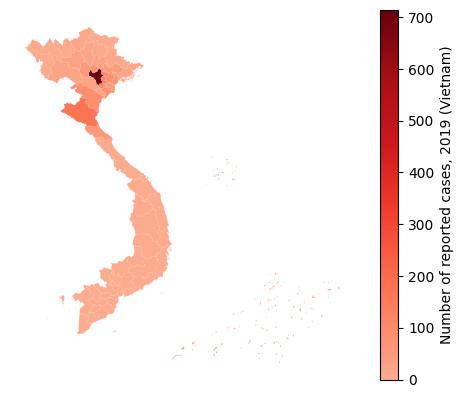

In [105]:
patients = list(df['Patient']) + [0] * (len(gdf) - len(df))
gdf = gdf.sort_values(by='ADM1_EN')

if 'Patient' in gdf.columns:
    gdf = gdf.drop('Patient', axis=1)

gdf.insert(0, 'Patient', patients)

f, ax = plt.subplots(1)
gdf_ax = gdf.plot(column='Patient', figsize=(10, 10), cmap=cmap, ax=ax, legend=True)
gdf_ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Number of reported cases, 2019 (Vietnam)')

### Timeline: 2017

In [106]:
# Load the data
df_years = pd.read_csv('../Data/year_and_province.csv')

In [107]:
# Some provinces missing the 'city' suffix. We may hardcode it here.

for province in df_years['Province']:
    if province not in gdf['ADM1_EN'].values:
        df_years['Province'] = df_years['Province'].replace(province, province + ' city')

# Some provinces are not in the shapefile. We may add them manually.
for province in gdf['ADM1_EN'].values:
    if province not in df_years['Province'].values:
        df_years = pd.concat([df_years, pd.DataFrame({'Province': [province], '2017': [0], '2018': [0], '2019': [0]})], ignore_index=True)

df_years = df_years.sort_values(by='Province', ignore_index=True)

In [108]:
df_years

,Province,2017,2018,2019
0,An Giang,0,0,0
1,Ba Ria - Vung Tau,0,0,1
2,Bac Giang,3,12,38
3,Bac Kan,1,2,1
4,Bac Lieu,0,0,0
...,...,...,...,...
58,Tra Vinh,0,0,0
59,Tuyen Quang,0,2,15
60,Vinh Long,0,0,0
61,Vinh Phuc,12,16,47


Text(561.7327777777779, 0.5, 'Number of reported cases, 2017-19 (Vietnam)')

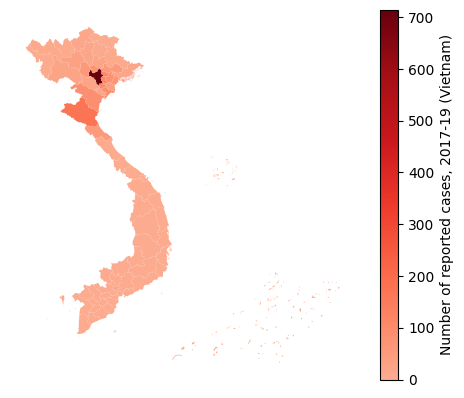

In [109]:
patients = list(df_years['2017'] + df_years['2018'] + df_years['2019']) + [0] * (len(gdf) - len(df))
gdf_all = gdf.sort_values(by='ADM1_EN')

gdf_all.insert(0, 'Patient_1719', patients)

f, ax = plt.subplots(1)
gdf_ax = gdf_all.plot(column='Patient_1719', figsize=(10, 10), cmap=cmap, ax=ax, legend=True)
gdf_ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Number of reported cases, 2017-19 (Vietnam)')

Text(552.9827777777779, 0.5, 'Number of reported cases, 2017 (Vietnam)')

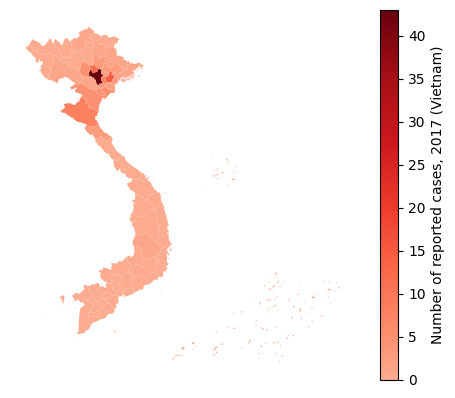

In [110]:
patients = list(df_years['2017']) + [0] * (len(gdf) - len(df))
gdf_2017 = gdf.sort_values(by='ADM1_EN')

gdf_2017.insert(0, 'Patient_2017', patients)

f, ax = plt.subplots(1)
gdf_ax = gdf_2017.plot(column='Patient_2017', figsize=(10, 10), cmap=cmap, ax=ax, legend=True)
gdf_ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Number of reported cases, 2017 (Vietnam)')

### Timeline: 2018

Text(561.7327777777779, 0.5, 'Number of reported cases, 2018 (Vietnam)')

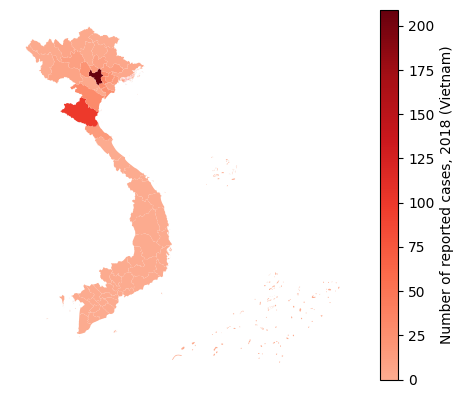

In [111]:
patients = list(df_years['2018']) + [0] * (len(gdf) - len(df))
gdf_2018 = gdf.sort_values(by='ADM1_EN')

gdf_2018.insert(0, 'Patient_2018', patients)

f, ax = plt.subplots(1)
gdf_ax = gdf_2018.plot(column='Patient_2018', figsize=(10, 10), cmap=cmap, ax=ax, legend=True)
gdf_ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Number of reported cases, 2018 (Vietnam)')

### Timeline: 2019

Text(561.7327777777779, 0.5, 'Number of reported cases, 2019 (Vietnam)')

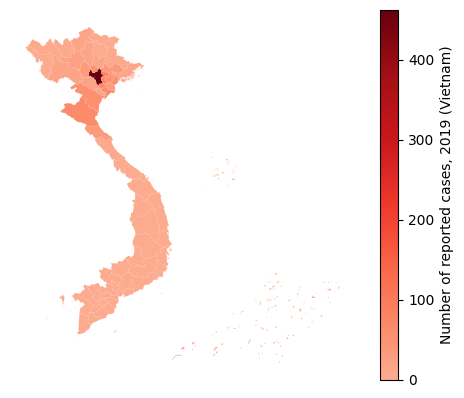

In [112]:
patients = list(df_years['2019']) + [0] * (len(gdf) - len(df))
gdf_2019 = gdf.sort_values(by='ADM1_EN')

gdf_2019.insert(0, 'Patient_2019', patients)

f, ax = plt.subplots(1)
gdf_ax = gdf_2019.plot(column='Patient_2019', figsize=(10, 10), cmap=cmap, ax=ax, legend=True)
gdf_ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Number of reported cases, 2019 (Vietnam)')

### Comparison side-by-side

Text(0.5, 0.98, 'Residence of reported cases in Vietnam, 2017 - 2019')

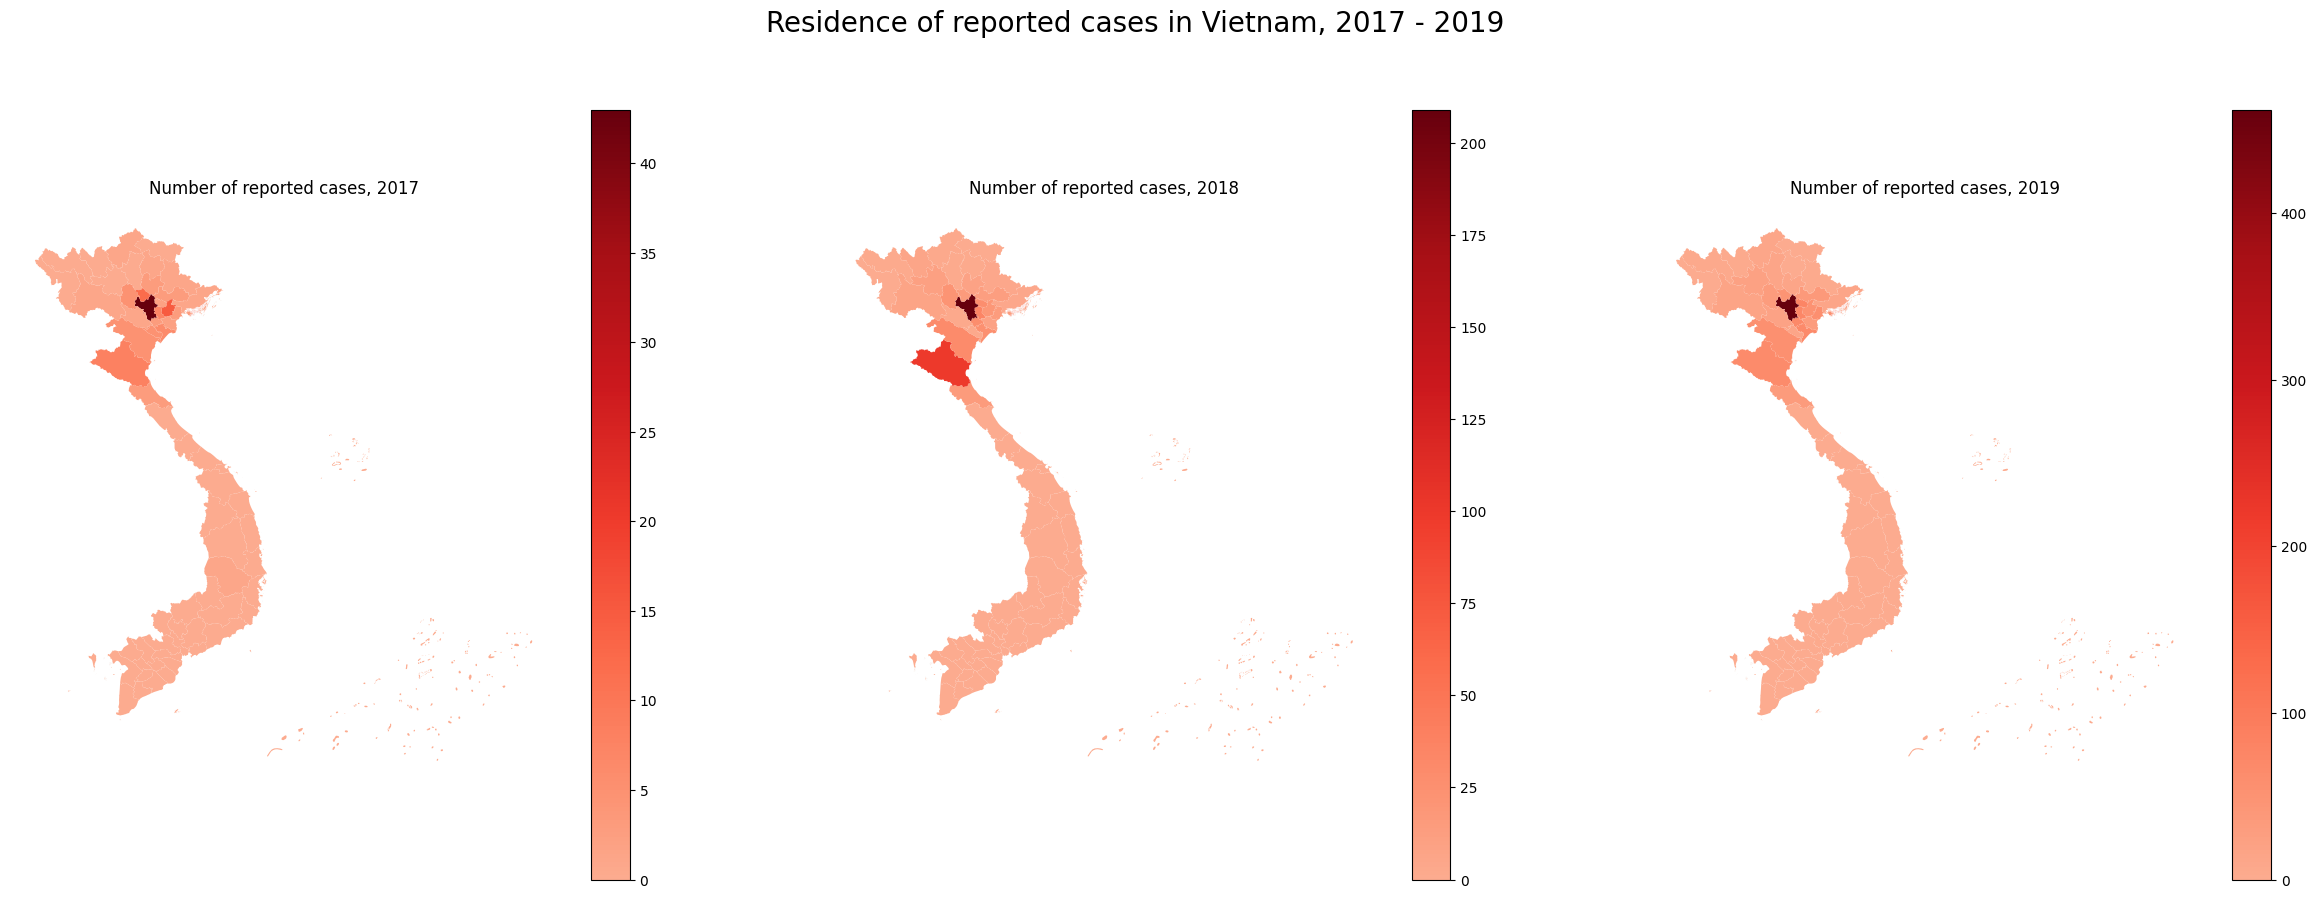

In [113]:
f, axes = plt.subplots(figsize=(30, 10), ncols=3, nrows=1, sharex=True, sharey=True)
gdf_2017.plot(column='Patient_2017', cmap=cmap, ax=axes[0], legend=True)
axes[0].set_title('Number of reported cases, 2017')
axes[0].set_axis_off()
gdf_2018.plot(column='Patient_2018', cmap=cmap, ax=axes[1], legend=True)
axes[1].set_title('Number of reported cases, 2018')
axes[1].set_axis_off()
gdf_2019.plot(column='Patient_2019', cmap=cmap, ax=axes[2], legend=True)
axes[2].set_title('Number of reported cases, 2019')
axes[2].set_axis_off()
f.suptitle('Residence of reported cases in Vietnam, 2017 - 2019', fontsize=20)

### Map for Northern and Central Provinces

In [114]:
gdf_partial = gdf.copy()
gdf_partial.shape

(63, 18)

In [115]:
provinces = ['Lao Cai','Yen Bai','Lai Chau','Dien Bien','Son La','Hoa Binh', 'Ha Giang','Tuyen Quang','Phu Tho',
             'Thai Nguyen','Bac Kan','Cao Bang','Lang Son','Bac Giang','Quang Ninh',
             'Hai Phong city','Vinh Phuc','Bac Ninh','Hung Yen','Hai Duong','Thai Binh','Nam Dinh','Ninh Binh','Ha Nam',
             'Ha Noi','Thanh Hoa','Nghe An'
            #  ,'Ha Tinh','Quang Binh','Quang Tri','Thua Thien Hue','Quang Nam','Quang Ngai',
            #  'Binh Dinh','Phu Yen','Khanh Hoa','Ninh Thuan','Binh Thuan','Kon Tum','Gia Lai','Dak Lak'
             ]

In [116]:
for province in gdf_partial['ADM1_EN'].values:
    if province not in provinces:
        gdf_partial = gdf_partial[gdf_partial['ADM1_EN'] != province]

for province in df_years['Province'].values:
    if province not in provinces:
        df_years = df_years[df_years['Province'] != province]

In [117]:
gdf_partial.shape, len(provinces), df_years.shape

((27, 18), 27, (27, 4))

Text(552.9827777777779, 0.5, 'Number of reported cases, 2017 (Vietnam)')

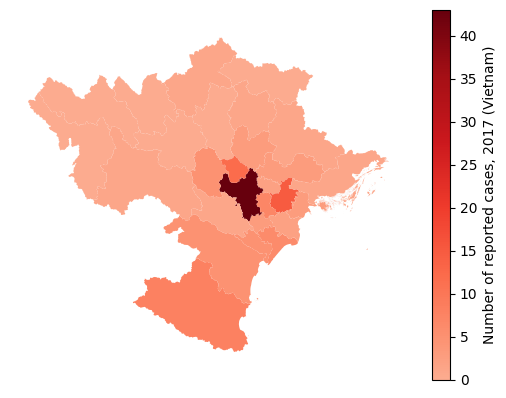

In [118]:
patients = list(df_years['2017']) + [0] * (len(gdf) - len(df))
gdf_2017 = gdf_partial.sort_values(by='ADM1_EN')

gdf_2017.insert(0, 'Patient_2017', patients)

f, ax = plt.subplots(1)
gdf_ax = gdf_2017.plot(column='Patient_2017', figsize=(10, 10), cmap=cmap, ax=ax, legend=True)
gdf_ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Number of reported cases, 2017 (Vietnam)')

Text(561.7327777777779, 0.5, 'Number of reported cases, 2018 (Vietnam)')

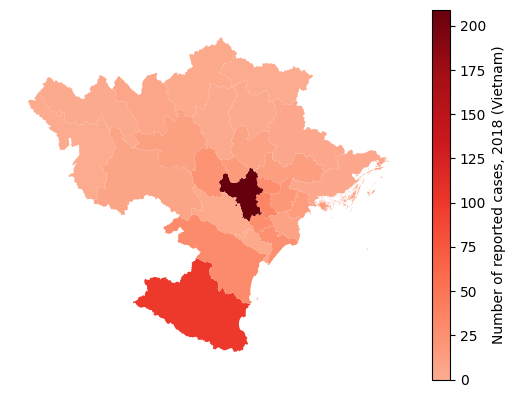

In [119]:
patients = list(df_years['2018']) + [0] * (len(gdf) - len(df))
gdf_2018 = gdf_partial.sort_values(by='ADM1_EN')

gdf_2018.insert(0, 'Patient_2018', patients)

f, ax = plt.subplots(1)
gdf_ax = gdf_2018.plot(column='Patient_2018', figsize=(10, 10), cmap=cmap, ax=ax, legend=True)
gdf_ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Number of reported cases, 2018 (Vietnam)')

Text(561.7327777777779, 0.5, 'Number of reported cases, 2019 (Vietnam)')

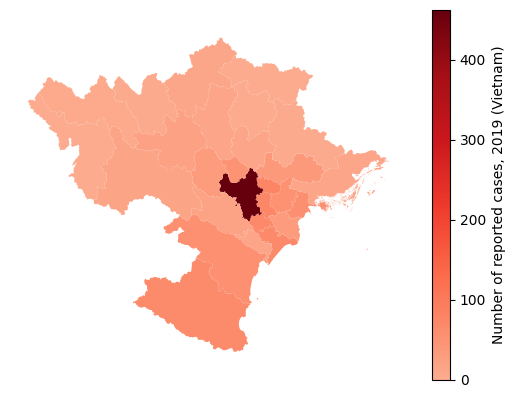

In [120]:
patients = list(df_years['2019']) + [0] * (len(gdf) - len(df))
gdf_2019 = gdf_partial.sort_values(by='ADM1_EN')

gdf_2019.insert(0, 'Patient_2019', patients)

f, ax = plt.subplots(1)
gdf_ax = gdf_2019.plot(column='Patient_2019', figsize=(10, 10), cmap=cmap, ax=ax, legend=True)
gdf_ax.set_axis_off()
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Number of reported cases, 2019 (Vietnam)')

Text(0.5, 0.98, 'Residence of reported cases in Vietnam, 2017 - 2019')

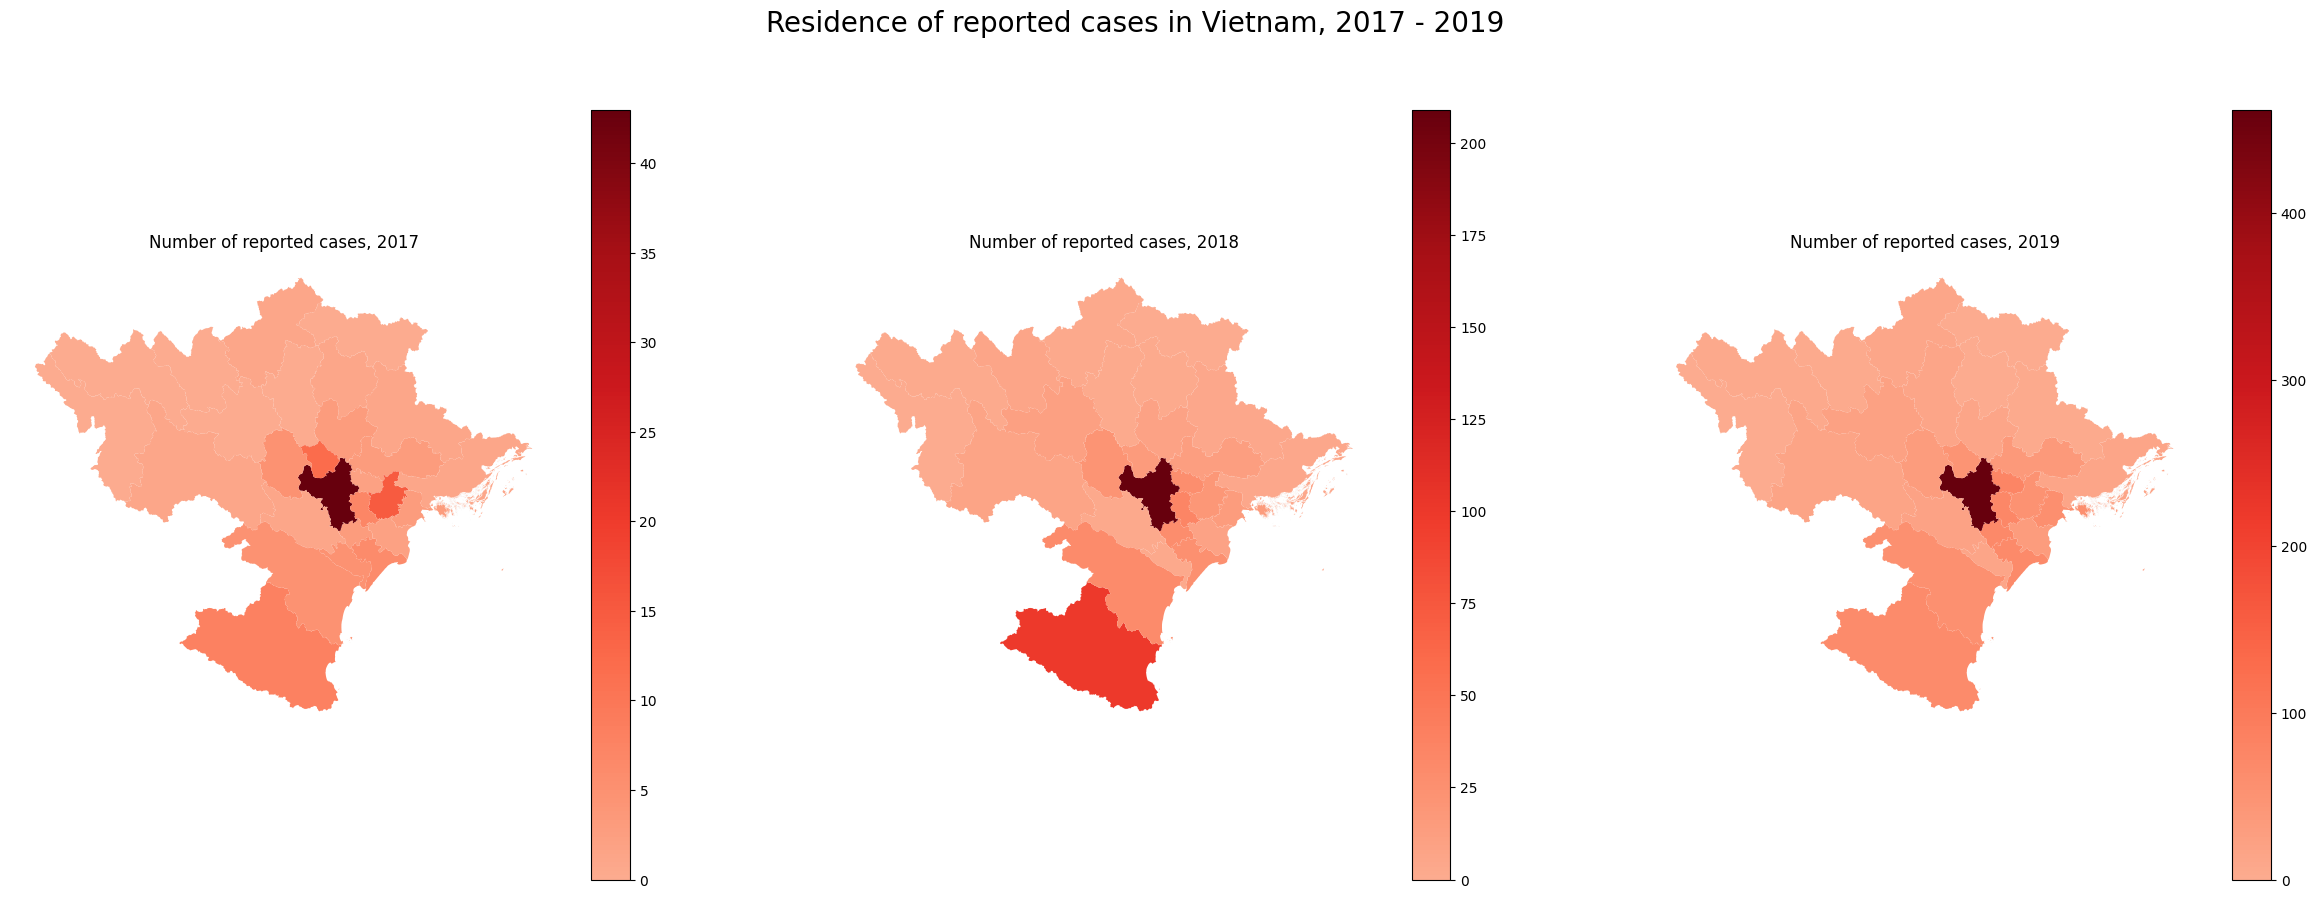

In [121]:
f, axes = plt.subplots(figsize=(30, 10), ncols=3, nrows=1, sharex=True, sharey=True)
gdf_2017.plot(column='Patient_2017', cmap=cmap, ax=axes[0], legend=True)
axes[0].set_title('Number of reported cases, 2017')
axes[0].set_axis_off()
gdf_2018.plot(column='Patient_2018', cmap=cmap, ax=axes[1], legend=True)
axes[1].set_title('Number of reported cases, 2018')
axes[1].set_axis_off()
gdf_2019.plot(column='Patient_2019', cmap=cmap, ax=axes[2], legend=True)
axes[2].set_title('Number of reported cases, 2019')
axes[2].set_axis_off()
f.suptitle('Residence of reported cases in Vietnam, 2017 - 2019', fontsize=20)

## Histogram

In [122]:
# Load the data
data = pd.read_csv('../Data/out.csv')

### Critical vs. Non critical

In [123]:
import datetime
from matplotlib.dates import date2num

In [124]:
data['Clinical classification'].value_counts()
data['admission_date'] = pd.to_datetime(data['admission_date']).dt.date
data = data.sort_values(by='admission_date')
print(data['admission_date'])

1761    2017-07-09
1950    2017-07-11
93      2017-07-13
1999    2017-07-17
2007    2017-07-18
           ...    
256     2019-12-04
1648    2019-12-05
812     2019-12-10
1618    2019-12-10
770     2019-12-12
Name: admission_date, Length: 2072, dtype: object


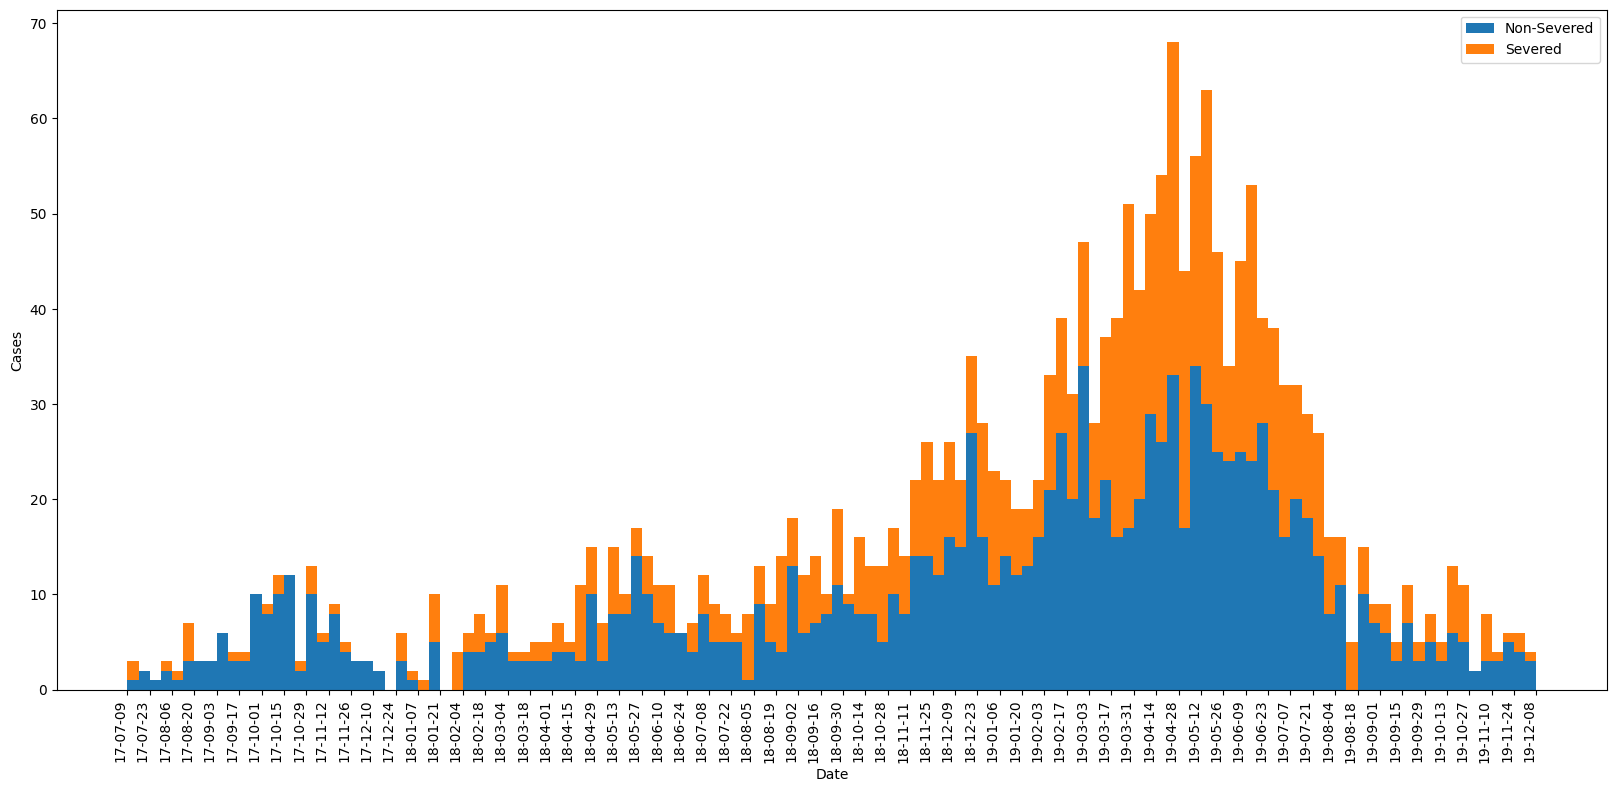

In [125]:
from matplotlib.dates import DateFormatter

start, end = data['admission_date'].min(), data['admission_date'].max()
one_day = datetime.timedelta(days=1)

pack = [
        np.array(data[data['Clinical classification'] == 0][['admission_date']]).flatten(),
        # np.array([]).flatten(),
        np.array(data[data['Clinical classification'] == 1][['admission_date']]).flatten(),
    ]

weeks = []
for i in range(0, (end - start).days + 1, 7):
    weeks.append(start + i * one_day)

numweek = date2num(weeks)

# Draw stacked bar chart, divided by week, based on Clinical classification
f, ax = plt.subplots(figsize=(20, 10))
n, bins, patches = ax.hist(pack, bins=numweek, stacked=True, label=['Non-Severed', 'Severed'])
ax.xaxis.set_major_formatter(DateFormatter("%y-%m-%d"))
ax.xaxis.set_ticks(np.arange(weeks[0], weeks[-1] + one_day, 7 * 2))
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
#ax.set_title('Severed vs. Non-severed')
plt.gcf().autofmt_xdate(rotation=90)

### Deceased vs. Alive

In [126]:
data['outcome_died'].value_counts()

0    2042
1      30
Name: outcome_died, dtype: int64

2042 30


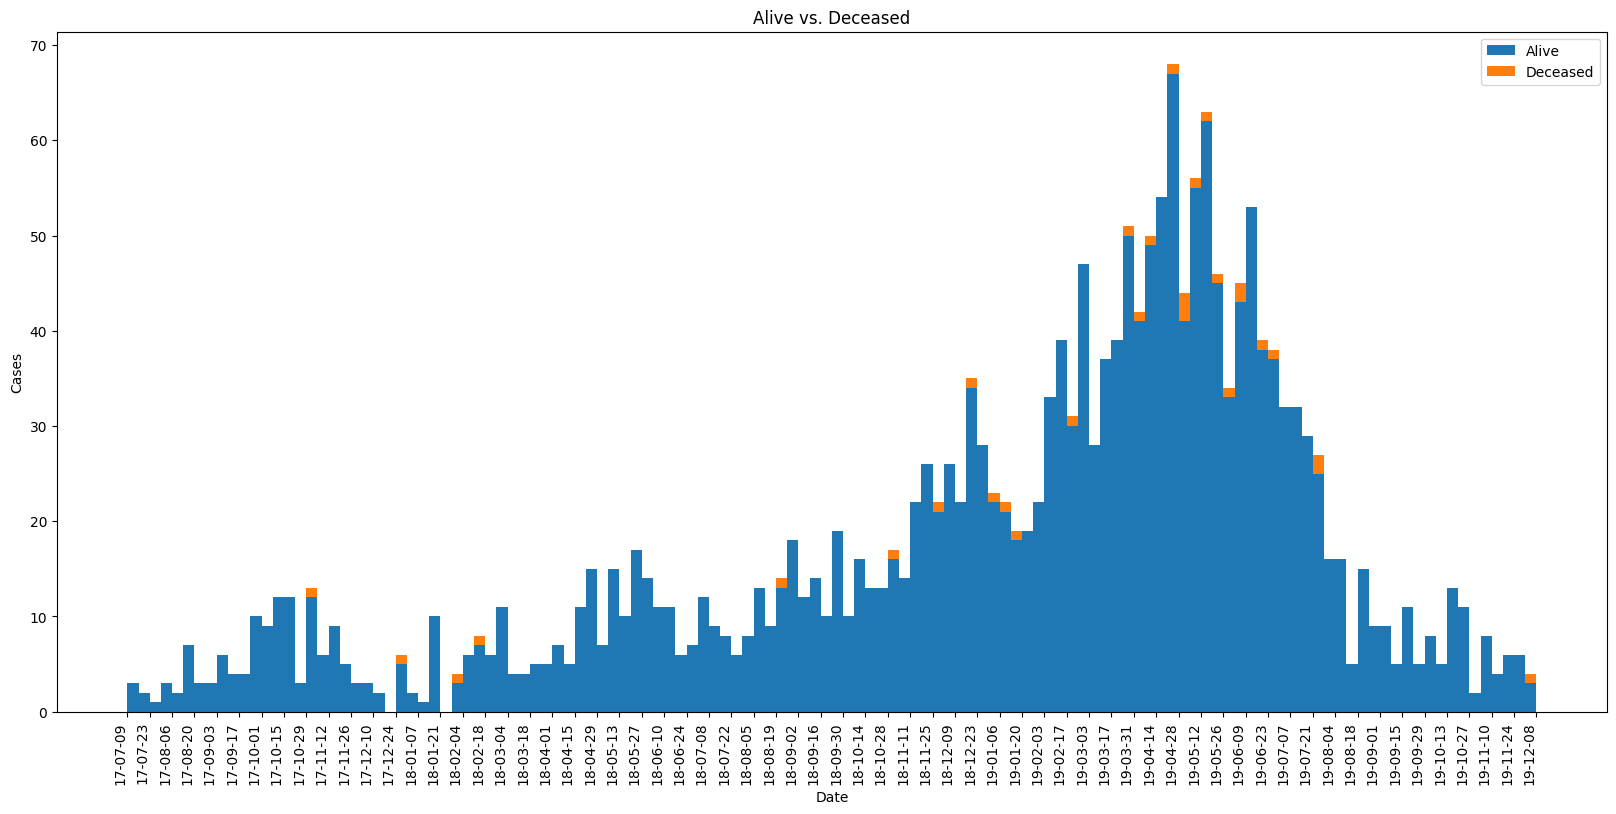

In [127]:
start, end = data['admission_date'].min(), data['admission_date'].max()
one_day = datetime.timedelta(days=1)

pack = [
        np.array(data[data['outcome_died'] == 0][['admission_date']]).flatten(),
        # np.array([]).flatten(),
        np.array(data[data['outcome_died'] == 1][['admission_date']]).flatten(),
    ]
print(pack[0].size, pack[1].size)

weeks = []
for i in range(0, (end - start).days + 1, 7):
    weeks.append(start + i * one_day)

numweek = date2num(weeks)

# Draw stacked bar chart, divided by week, based on Clinical classification
# plt.figure(figsize=(20, 10))
# plt.hist(pack, bins=numweek, stacked=True, label=['Alive', 'Deceased'])
# plt.legend()

f, ax = plt.subplots(figsize=(20, 10))
n, bins, patches = ax.hist(pack, bins=numweek, stacked=True, label=['Alive', 'Deceased'])
ax.xaxis.set_major_formatter(DateFormatter("%y-%m-%d"))
ax.xaxis.set_ticks(np.arange(weeks[0], weeks[-1] + one_day, 7 * 2))
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('Alive vs. Deceased')
plt.gcf().autofmt_xdate(rotation=90)
# plt.gcf().autofmt_xdate()

,date,value
0,2017-07-09,0.071429
0,2017-07-10,0.071429
0,2017-07-11,0.142857
0,2017-07-12,0.142857
0,2017-07-13,0.214286
...,...,...
0,2019-12-07,0.785714
0,2019-12-08,0.714286
0,2019-12-09,0.714286
0,2019-12-10,0.785714


Text(0, 0.5, 'Cases')

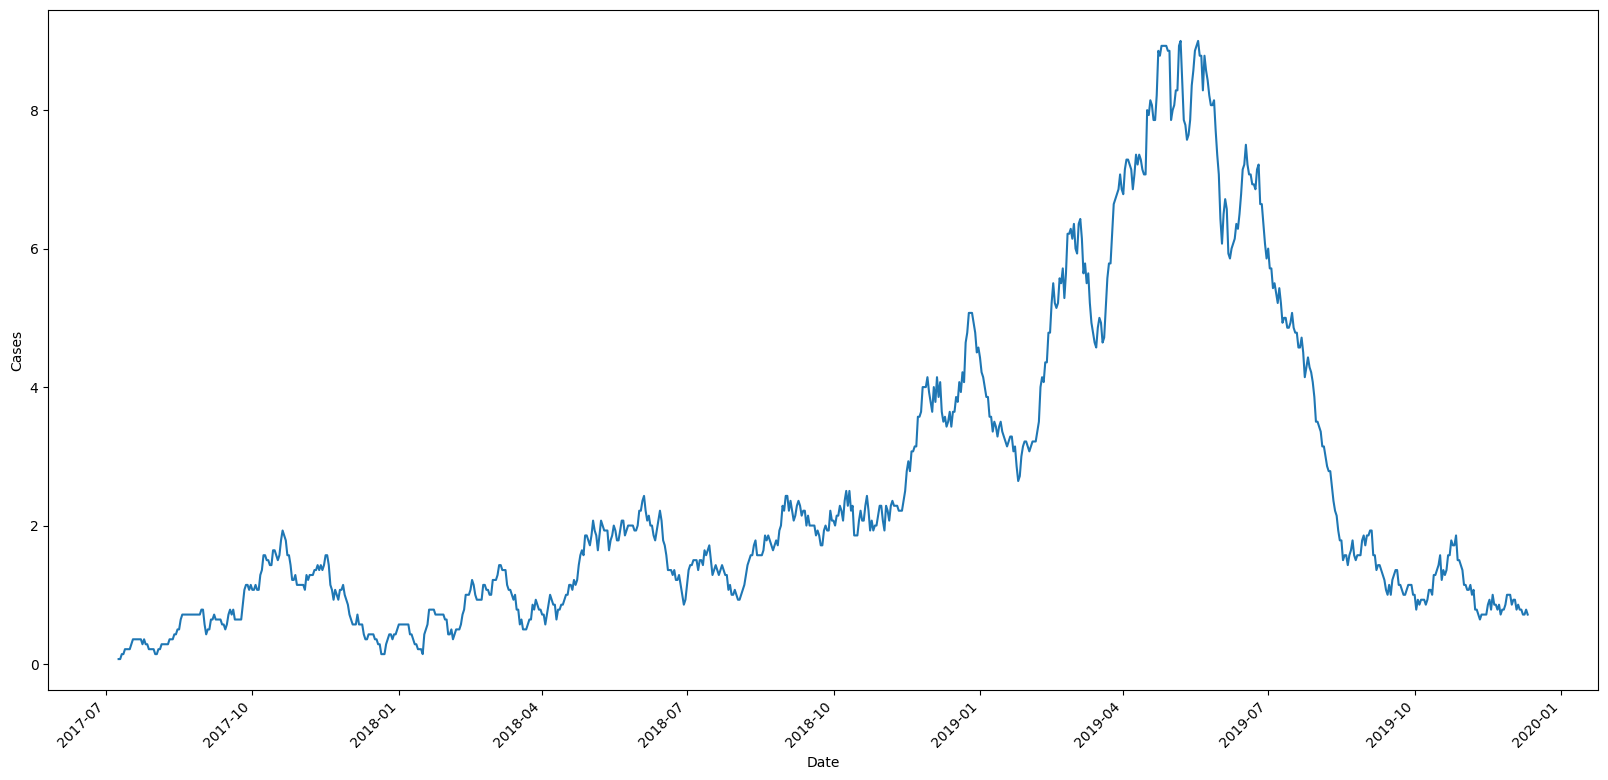

In [128]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)

x = data['admission_date'].value_counts()
# create dataframe y with column 1 is date, column 2 is value, content is x
y = pd.DataFrame({'date': x.index, 'value': x.values})
y.sort_values(by='date', inplace=True, ignore_index = True)

z = pd.DataFrame({'date': [], 'value': []})
start_date = datetime.date(2017, 7, 9)
end_date = datetime.date(2019, 12, 12)
for single_date in daterange(start_date, end_date):
    #print(single_date.strftime("%Y-%m-%d"))
    total = 0
    for i in range(len(y)):
        if single_date - y['date'][i] <= datetime.timedelta(days=14) and single_date - y['date'][i] >= datetime.timedelta(days=0):
            total += y['value'][i]
    newrow = pd.DataFrame({'date': [single_date], 'value': [total / 14]})
    z = pd.concat([z, newrow])
display(z)

# plot z
plt.figure(figsize=(20, 10))
#sns.lineplot(x="date", y="value", data=y, ci=None)
plt.plot(z['date'], z['value'])
plt.gcf().autofmt_xdate(rotation=45)
plt.xlabel('Date')
plt.ylabel('Cases')

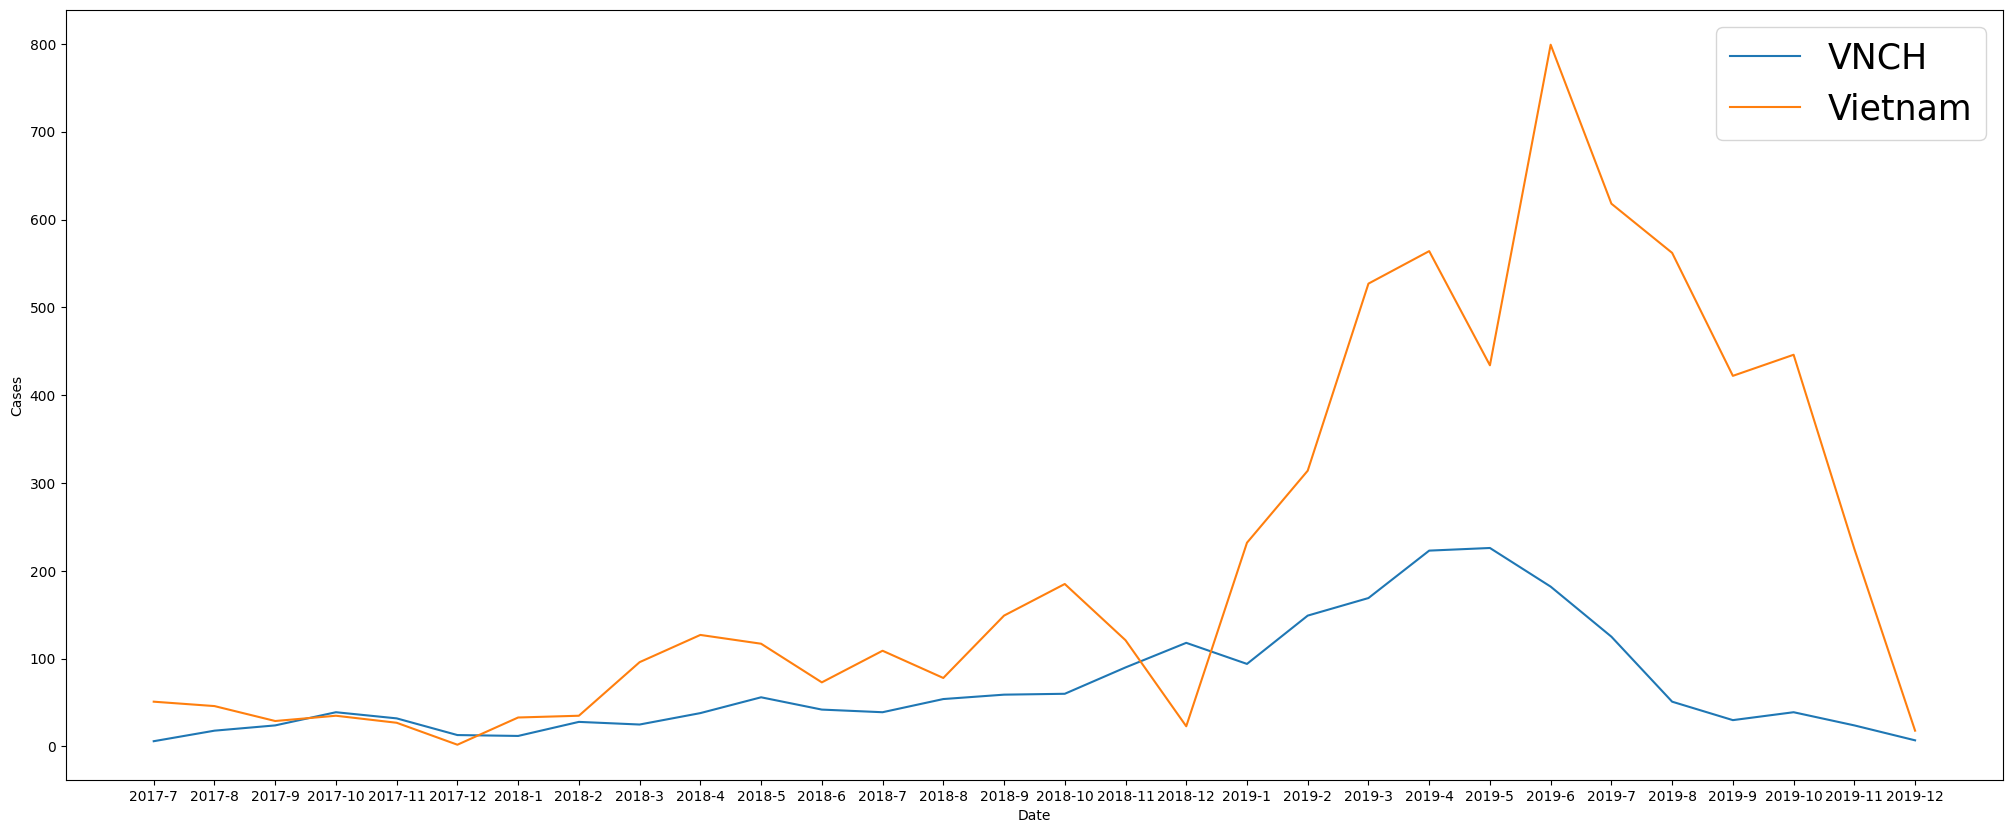

In [183]:
# measles cases by month in vietnam
# data took from Measles-Rubella-Bulletin-2019-Vol-13-No-06.pdf (Jan)
# data took from Measles-Rubella-Bulletin-2019-Vol-13-No-08.pdf (Feb-Mar)
# data took from Measles-Rubella-Bulletin-2019-Vol-13-No-10.pdf (Apr-May)
# data took from Measles-Rubella-Bulletin-2019-Vol-13-No-12.pdf (Jun-Nov)
# data took from Measles-Rubella-Bulletin-2020-Vol-14-No-06.pdf (Dec)
vn2019 = [232, 314, 527, 564, 434, 799, 618, 562, 422, 446, 225, 18]
# data took from Measles-Rubella-Bulletin-2019-Vol-12-No-07.pdf (Jan-Feb)
# data took from Measles-Rubella-Bulletin-2019-Vol-12-No-09.pdf (Mar-Apr)
# data took from Measles-Rubella-Bulletin-2019-Vol-12-No-11.pdf (May-Jun)
# data took from Measles-Rubella-Bulletin-2019-Vol-13-No-01.pdf (Jul-Dec)
vn2018 = [33, 35, 96, 127, 117, 73, 109, 78, 149, 185, 121, 23]
# data took from Measles-Rubella-Bulletin-2018-Vol-12-No-01.pdf (Jul-Dec)
vn2017 = [51, 46, 29, 35, 27, 2]    # only need from Jul to Dec
vnplot = []
for i in range(len(vn2017)):
    vnplot.append( ('2017-'+str(i+7),vn2017[i]) )
for i in range(len(vn2018)):
    vnplot.append( ('2018-'+str(i+1),vn2018[i]) )
for i in range(len(vn2019)):
    vnplot.append( ('2019-'+str(i+1),vn2019[i]) )

x = data['admission_date'].astype("datetime64[ns]")
y = [i.year for i in x]
m = [i.month for i in x]
# create new dataframe for year and month
z = pd.DataFrame({'year': y, 'month': m})
# count occurences of each year and month
z = z.groupby(['year', 'month']).size().reset_index(name='counts')
# group year and month columns into one column
z['date'] = z['year'].astype(str) + '-' + z['month'].astype(str)
#plot z with date column as x-axis
plt.figure(figsize=(25, 10))
plt.plot(z['date'], z['counts'], label='VNCH')
plt.plot([i[0] for i in vnplot], [i[1] for i in vnplot], label='Vietnam')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(prop={'size': 25})
plt.title('Measles cases by month in Vietnam and in , 2017 - 2019')